In [19]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
crashes = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [3]:
crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/02/2020,0:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4267700,Sedan,NaN,NaN,NaN,NaN
1,01/02/2020,12:57,NaN,NaN,NaN,NaN,NaN,W 57 & 8th Ave,W 57,NaN,...,Unspecified,NaN,NaN,NaN,4268255,Taxi,Pick-up Truck,NaN,NaN,NaN
2,01/02/2020,15:00,NaN,NaN,40.668266,-73.84214,"(40.668266, -73.84214)",CROSS BAY BOULEVARD,SOUTH CONDUIT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4268222,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
3,01/02/2020,15:10,BROOKLYN,11206.0,40.700527,-73.94161,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN
4,01/02/2020,17:30,NaN,NaN,NaN,NaN,NaN,NORTHERN BOULEVARD,68 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4268708,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [4]:
crashes['CRASH TIME'] = pd.to_datetime(crashes['CRASH TIME'])
crashes['CRASH DATE'] = pd.to_datetime(crashes['CRASH DATE'])
crashes.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [5]:
crashes_filtered = crashes["BOROUGH"].notnull() 
crashes_filtered.head()

0    False
1    False
2    False
3     True
4    False
Name: BOROUGH, dtype: bool

In [6]:
crashes_clean = crashes[crashes_filtered]

In [7]:
crashes_clean.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2020-01-02,2021-03-16 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN
5,2020-01-02,2021-03-16 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,...,Unspecified,NaN,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,2020-01-02,2021-03-16 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,...,Other Vehicular,NaN,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN
9,2020-01-02,2021-03-16 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN
11,2020-01-02,2021-03-16 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,...,NaN,NaN,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Hours')

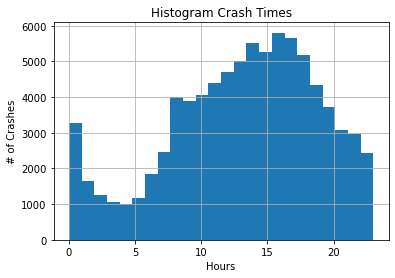

In [8]:
crashes_clean["CRASH TIME"].dt.hour.hist(bins = 24)
plt.title("Histogram Crash Times")
plt.ylabel("# of Crashes")
plt.xlabel("Hours")

Text(0.5, 0, 'Boroughs')

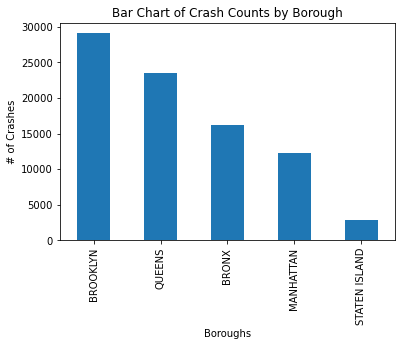

In [9]:
crashes_clean['BOROUGH'].value_counts().plot(kind='bar');
plt.title("Bar Chart of Crash Counts by Borough")
plt.ylabel("# of Crashes")
plt.xlabel("Boroughs")

In [10]:
crash_veh1 = crashes_clean["VEHICLE TYPE CODE 1"] == "Sedan"
crash_veh2 = crashes_clean["VEHICLE TYPE CODE 1"] == "Station Wagon/Sport Utility Vehicle"
crash_veh3 = crashes_clean["VEHICLE TYPE CODE 1"] == "Taxi"
crash_veh4 = crashes_clean["VEHICLE TYPE CODE 1"] == "Pick-up Truck"
crash_veh5 = crashes_clean["VEHICLE TYPE CODE 1"] == "Box Truck"
crash_veh6 = crashes_clean["VEHICLE TYPE CODE 1"] == "Bus"
crash_veh7 = crashes_clean["VEHICLE TYPE CODE 1"] == "Bike"

crashestest = crashes_clean[crash_veh1 | crash_veh2 | crash_veh3 | crash_veh4 | crash_veh5 | crash_veh6 | crash_veh7]
#sns.relplot(x="VEHICLE TYPE CODE 1", y="NUMBER OF PERSONS INJURED", hue="BOROUGH", data=crashestest)
crashestest["MONTH"] = crashestest["CRASH DATE"].dt.month
crashestest.reset_index(drop=True)
crashestest.dtypes

<ipython-input-10-5f151ad603a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashestest["MONTH"] = crashestest["CRASH DATE"].dt.month


CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

Text(0.5, 6.79999999999999, 'Month')

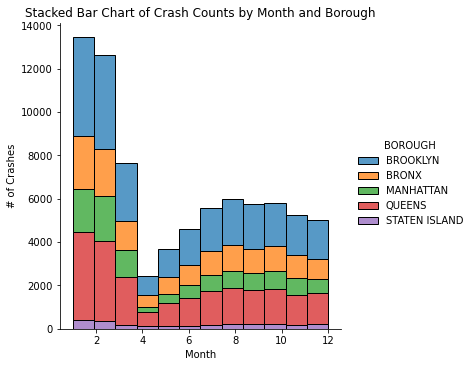

In [11]:
sns.displot(crashestest, x="MONTH", hue="BOROUGH", multiple="stack", bins = 12)
plt.title("Stacked Bar Chart of Crash Counts by Month and Borough")
plt.ylabel("# of Crashes")
plt.xlabel("Month")

In [52]:
#crashestest2 = crashestest["LATITUDE"] != 0
crashes_map = folium.Map(location=[40.7128, -74.0060])
crashestest.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
crashestest = crashestest.reset_index(drop=True)

In [13]:
crashestest.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH
0,2020-01-02,2021-03-16 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN,1
1,2020-01-02,2021-03-16 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,...,NaN,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1
2,2020-01-02,2021-03-16 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,...,NaN,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN,1
3,2020-01-02,2021-03-16 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,...,NaN,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN,1
4,2020-01-02,2021-03-16 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,...,NaN,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN,1


In [23]:
crashestest['COUNT'] = crashestest.groupby('LATITUDE')['LONGITUDE'].transform('count')

In [53]:

HeatMap(data=crashestest[['LATITUDE', 'LONGITUDE','COUNT']].groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), radius=13).add_to(crashes_map)
crashes_map

Text(0.5, 6.79999999999999, 'Month')

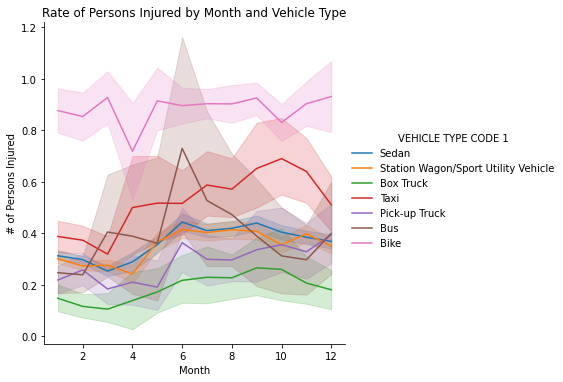

In [67]:
sns.relplot(x = "MONTH", y = "NUMBER OF PERSONS INJURED", hue = "VEHICLE TYPE CODE 1", kind = "line", data = crashestest)
plt.title("Rate of Persons Injured by Month and Vehicle Type")
plt.ylabel("# of Persons Injured")
plt.xlabel("Month")

#
profile = ProfileReport(crashes, title='Pandas Profiling Report', explorative=True)

profile.to_file("crashes.html")